In [17]:
#importig required libraries

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#Using windows machine so changed the working directory to 
#where file is present

cd D:\datascience

D:\datascience


In [3]:
#Read The Data File
df= pd.read_csv('aSawData2.csv')

#data has exponential value so making it as a float number
pd.options.display.float_format='{:,.4f}'.format
df.head()
df.price.describe()

count      21,613.0000
mean      540,088.1418
std       367,127.1965
min        75,000.0000
25%       321,950.0000
50%       450,000.0000
75%       645,000.0000
max     7,700,000.0000
Name: price, dtype: float64

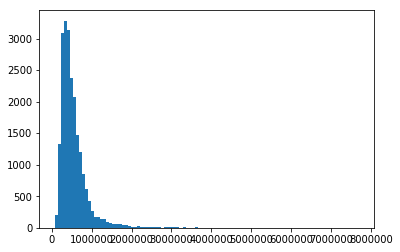

In [5]:
#1)plotting distribution of price variable as it is
#without checking for normalisation of data
plt.hist(df.price,bins=100)
plt.show()

In [6]:
#to check the skewness of the data.
print('the skewness of the data is: ', df.price.skew())


the skewness of the data is:  4.024069144684712


In [7]:
#the data is said to be almost normalized as the skew value nears to 0.
#the above value suggests that data is not normalized 
#and by figure above we can say that its positively skewed data.

the skew of target is:  0.42807247557592526


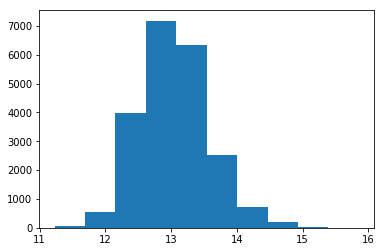

In [8]:
#to make the data normalized by reducing the skewness.
target=np.log(df.price) #normalizing the values by using log transformation

print('the skew of target is: ',target.skew())
plt.hist(target)
plt.show()

[]

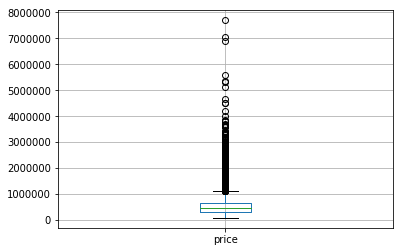

In [9]:
#box plot of the price variable.
df.boxplot(column='price')
plt.plot()

In [10]:
#to find outliers we use bounding method to using quantile function 
#which gives the percentile value

lb=0.1 #lower bound
ub=.95 #upper bound

res=df.quantile([lb,ub])
res

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.1000,"1,036,000,346.0000","245,000.0000",2.0000,1.0000,"1,090.0000","3,322.2000",1.0000,0.0000,0.0000,3.0000,6.0000,970.0000,0.0000,"1,926.0000",0.0000,"98,008.0000",47.3503,-122.3720,"1,256.0000","3,666.6000"
0.9500,"9,297,300,429.0000","1,156,480.0000",5.0000,3.5000,"3,760.0000","43,339.2000",2.0000,0.0000,2.0000,5.0000,10.0000,"3,400.0000","1,190.0000","2,011.0000",0.0000,"98,177.0000",47.7496,-121.9790,"3,300.0000","37,062.8000"


In [11]:
#calculating the non outliers and outliers
true_value= (res.loc[lb].price < df.price.values) & (df.price.values < res.loc[ub].price)
true_value #false indicates outliers

array([False,  True, False, ...,  True,  True,  True])

In [12]:
false_value=~true_value #calcuating outliers
false_value

array([ True, False,  True, ..., False, False, False])

In [13]:
#displaying outliers for price variable
df.price[false_value]

0         221900
2         180000
5        1225000
8         229500
18        189000
19        230000
21       2000000
25        233000
38        240000
46        210490
49       1350000
50        228000
68        204000
69       1325000
88        215000
90        243500
92        153000
97        199000
107       188500
117       205425
118       171800
125      1450000
130       212000
135       199000
136       220000
142       205000
153      2250000
155       215000
183       163500
191       166950
          ...   
21321    1350000
21323    1500000
21332     245000
21333    1999950
21344    1488000
21368    2065000
21375    1174660
21383    1765000
21451     239950
21467    1987500
21473    1750000
21485    1720000
21486    1459000
21505    1555000
21506    2238890
21514    1865000
21520    1408760
21521    1378000
21525    1450000
21530    3000000
21532    1325000
21540    1881580
21551    1375000
21568    1700000
21572     230000
21576    3567000
21590    1222500
21597    15750

In [14]:
#the above method to finding outliers can be used 
#for different variables also

In [15]:
#2) To find correlation between price and other variables
correlation=df.corr()

print(correlation.price.sort_values(ascending=False)[:5],'\n')
#the above value are most positively correlated variables
print(correlation.price.sort_values(ascending=False)[-5:])
#the above value are most negatively correlated variables

price           1.0000
sqft_living     0.7020
grade           0.6674
sqft_above      0.6056
sqft_living15   0.5854
Name: price, dtype: float64 

yr_built     0.0540
condition    0.0364
long         0.0216
id          -0.0168
zipcode     -0.0532
Name: price, dtype: float64


In [16]:
#3) to find the highest to ten median price for  the zipcode
loc=df.loc[:,['zipcode','price']] #creating dataframe to hold only zipcode and price variables

#calculating the median price for  the zipcode
zipcode_median_price=loc.query('price > price.median()').sort_values('price')

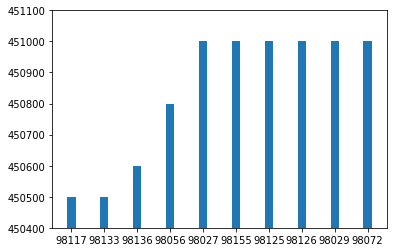

In [23]:
#calculating the top 10 highest median price for zipcode
zipcode_median_price=zipcode_median_price.head(10)


#bar blotting for the top 10 highest median price for zipcode

y_pos=np.arange(len(zipcode_median_price.zipcode))
low=zipcode_median_price.price.min()
high=zipcode_median_price.price.max()

plt.ylim([math.ceil(low-100),math.ceil(high+100)])
plt.bar(y_pos,zipcode_median_price.price,width=.25)

plt.xticks(y_pos,zipcode_median_price.zipcode)
plt.show()

In [24]:
#4) to Find the missing values count in each of the columns
print((df==0).sum())

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64


In [25]:
#to replace 0 with NaN followed by mean of respective columns
df_nan=df.replace(0,np.NaN)
df_nan=df_nan.fillna(df.mean())

In [26]:
#Checck if the data is properly replaced with the mean ofthe respective column
print(df.isnull().sum())
df_nan.head(10)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0000,1.0000,1180,5650,1.0000,0.0075,0.2343,...,7,1180,291.5090,1955,84.4023,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,538000,3.0000,2.2500,2570,7242,2.0000,0.0075,0.2343,...,7,2170,400.0000,1951,"1,991.0000",98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,180000,2.0000,1.0000,770,10000,1.0000,0.0075,0.2343,...,6,770,291.5090,1933,84.4023,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,604000,4.0000,3.0000,1960,5000,1.0000,0.0075,0.2343,...,7,1050,910.0000,1965,84.4023,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,510000,3.0000,2.0000,1680,8080,1.0000,0.0075,0.2343,...,8,1680,291.5090,1987,84.4023,98074,47.6168,-122.0450,1800,7503
5,7237550310,20140512T000000,1225000,4.0000,4.5000,5420,101930,1.0000,0.0075,0.2343,...,11,3890,"1,530.0000",2001,84.4023,98053,47.6561,-122.0050,4760,101930
6,1321400060,20140627T000000,257500,3.0000,2.2500,1715,6819,2.0000,0.0075,0.2343,...,7,1715,291.5090,1995,84.4023,98003,47.3097,-122.3270,2238,6819
7,2008000270,20150115T000000,291850,3.0000,1.5000,1060,9711,1.0000,0.0075,0.2343,...,7,1060,291.5090,1963,84.4023,98198,47.4095,-122.3150,1650,9711
8,2414600126,20150415T000000,229500,3.0000,1.0000,1780,7470,1.0000,0.0075,0.2343,...,7,1050,730.0000,1960,84.4023,98146,47.5123,-122.3370,1780,8113
9,3793500160,20150312T000000,323000,3.0000,2.5000,1890,6560,2.0000,0.0075,0.2343,...,7,1890,291.5090,2003,84.4023,98038,47.3684,-122.0310,2390,7570


In [27]:
#5 is explanation

In [28]:
#6) Regression model
#Linear Regression method [y=mx+c]
x=df.price.values
y=df.sqft_living


In [29]:
#to find the value of m and c

mean_x=np.mean(x)
mean_y=np.mean(y)

n=len(x)

numer=0
denom=0

for i in range(n):
    numer+=(x[i]-mean_x)*(y[i]-mean_y)
    denom+=(x[i]-mean_x)**2
b1=numer/denom
b2=mean_y-(b1*mean_x)

print(b1,b2) #m=b1,c=b2

0.0017562787815594424 1131.3543927134137


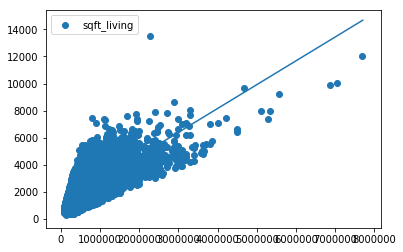

In [32]:
#to plot the regression model

x_min=np.min(x)-10000
x_max=np.max(x)+10000

xx=np.linspace(x_min,x_max)
yy=b1*xx +b2

plt.plot(xx,yy)
plt.scatter(x,y)
plt.legend()
plt.show()

In [33]:
#to find how efficient is my model

ss_t=0
ss_r=0

for i in range(n):
    y_pred=b1*x[i]+b2
    ss_t+= (y[i]-mean_y)**2
    ss_r +=(y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.49285321790379577
